# Price Analysis in Tri-City Restaurants

Below Notebook is an example analysis of gathered data from publicly available [*Wikipedia*](https://en.wikipedia.org/) and [*Inyourpocket*](https://www.inyourpocket.com) pages.<br>
In order to work on the same data, please run [web_scrap.ipynb Notebook](https://github.com/MarekJSokolowski/Price-Analysis-in-Tri-City-Restaurants/blob/main/web_scrap.ipynb).<br>

The goal of the project below is to use the data collected by *[web_scrap.ipynb Notebook](https://github.com/MarekJSokolowski/Price-Analysis-in-Tri-City-Restaurants/blob/main/web_scrap.ipynb)* to develop a robust predictive model. The developed model will allow us to estimate the minimum and maximum prices of restaurants in the Tri-City.

After an extensive analysis conducted in this study, I have identified the most effective predictive model for estimating restaurant minimum prices in the Tri-City area. Utilizing a random forest regressor with the features 'Wi-fi', 'Credit Cards', 'Dogs Allowed', 'Air-conditioning', 'servesCuisine', 'Home Delivery', 'addressLocality', 'distance [meters]', 'Facilities for disabled', 'Child-friendly', 'Outside seating',  and 'Takeaway', which achieved the best result, obtaining a Root Mean Squared Error (RMSE) of PLN 7.09. The findings from this Notebook suggest that if learning on such a small dataset alternative models and different labeling approaches should be considered when attempting to predict the maximum prices of restaurants in the Tri-City, as the selected models in this study were deemed inefficient. Looking at the training plots, you can see that all models quickly stopped learning due to the difference between the training set and the validation set, which is probably due to the small number of training examples.


## Table of Contents: ##
1. [Loading required libraries](#1)<br>
    1.1 [Installing external packages](#1)<br>
    1.2 [Importing the packages that will be used](#1.2)<br>
2. [Loading Datasets](#2)<br>
    2.1 [Predeffining Data Exploration Functions](#2)<br>
    2.2 [Loading a Dataset of railway stations](#2.2)<br>
    <span style="padding: 0 20px">2.2.1 [Brief Overview of Loaded Dataset](#2.2.1)</span><br>
    2.3 [Loading Restaurants and Sightseeing  Data](#2.3)<br>
    <span style="padding: 0 20px">2.3.1 [Brief Overview of Loaded Dataset](#2.3.1)</span><br>
    2.4 [Data Preprocessing](#2.4)<br>
3. [Data Visualization](#3)<br>
4. [Feature selection](#4)<br>
    4.1 [Discarding features that have low variance](#4.1)<br>
    4.2 [Discarding features based on the correlation value](#4.2)<br>
    4.3 [Discarding features using genetic algorithm](#4.3)<br>
5. [Model selection](#5)<br>
6. [Prediction](#6)<br>

I'm using '!*[pip](https://pypi.org/project/pip/)*' as I'm using the *Jupyter Notebook* in the *[Anaconda](https://www.anaconda.com/)* environment.

<a name='1'></a>
# 1. Loading required libraries
##    1.1 Installing external packages

In [ ]:
# !pip install pandas
# !pip install numpy==1.23.1
# !pip install matplotlib
# !pip install folium
# !pip install osmnx
# !pip install networkx
# !pip install scikit-learn
# !pip install seaborn
# !pip install sklearn-genetic
# !pip install tqdm

Versions of used libraries:

|library name|version|
|:-:|-:|
|[pandas](https://pandas.pydata.org/)|2.0.2|
|[NumPy](https://numpy.org/)|1.23.1|
|[Matplotlib](https://matplotlib.org/)|3.7.1|
|[seaborn](https://seaborn.pydata.org/)|0.12.2|
|[folium](https://github.com/python-visualization/folium)|0.14.0|
|[NetworkX](https://networkx.org/)|3.1|
|[scikit-learn](https://scikit-learn.org/)|1.2.2|
|[sklearn-genetic](https://github.com/manuel-calzolari/sklearn-genetic)|0.5.1|
|[tqdm](https://github.com/tqdm/tqdm)|4.65.0|

Note that to use the *genetic_selection* library, one has to use an older than current version of *NumPy*.

<a name='1.2'></a>
### 1.2 Importing the packages that will be used

In [1]:
# data handling
import re # string operations
import pandas as pd # structured data
import numpy as np  # arithmetics operations
from math import nan

# visualization
import matplotlib.pyplot as plt # standard graphs
import folium # maps visualization
import seaborn as sns

# graph handling
import osmnx as ox # graph creation eg. from maps
import networkx as nx # graph optimization

# for loops progress tracking
from tqdm.autonotebook import tqdm

# machine learning
from genetic_selection import GeneticSelectionCV # feature selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_19492\12332979.py:19: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


<a name='2'></a>
## 2. Loading Datasets

### 2.1 Predeffining Data Exploration Functions
Due to the future acquisition of multiple datasets, I have created a function below that will provide a brief overview of each dataset:

In [2]:
def pandas_DataFrame_overview(df:"pd.DataFrame"=None, describe=False):
    
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a Pandas DataFrame (pandas.DataFrame), the current df type is {}".format(type(df)))
        
    print('DataFrame Shape :', df.shape)
    
    # data to display
    data_to_display = dict()
    
    # Data Types
    data_to_display['Data Types'] = df.dtypes
    
    # Unique Values
    data_to_display['Unique Values'] = df.nunique()
    
    # Missing Values
    missing_values, no_rows = df.isnull().sum(), df.shape[0]
    data_to_display.update({
        'Missing Values (amount)': missing_values,
        'Missing Values (percentage)': missing_values/no_rows
    })
                  
    display(pd.DataFrame(data_to_display))
    
    # Sample data
    print('First 3 samples:')
    display(df.head(3))
    
    if describe == True:
        print('Summary Statistics:')
        display(df.describe().transpose())

<a name='2.2'></a>
### 2.2 Loading a Dataset of railway stations

In [3]:
df_railway_stations = pd.read_csv('tricity_stations_coordinates.csv')

<a name='2.2.1'></a>
#### 2.2.1 Brief Overview of Loaded Dataset

In [4]:
pandas_DataFrame_overview(df_railway_stations, describe=True)

DataFrame Shape : (20, 3)


,Data Types,Unique Values,Missing Values (amount),Missing Values (percentage)
name,object,20,0,0.0
latitude,float64,20,0,0.0
longitude,float64,20,0,0.0


First 3 samples:


,name,latitude,longitude
0,Gdańsk Główny,54.357222,18.644444
1,Gdańsk Stocznia,54.365278,18.640833
2,Gdańsk Politechnika,54.374167,18.627222


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
latitude,20.0,54.456117,0.067107,54.357222,54.397569,54.449306,54.522159,54.549759
longitude,20.0,18.553133,0.055099,18.446389,18.526944,18.557794,18.580625,18.644444


<a name='2.3'></a>
### 2.3 Loading a Dataset of Restaurants and Sightseeings

In [5]:
files_paths = (
    'inyourpocket_gdynia_sightseeing.csv',
    'inyourpocket_gdansk_sightseeing.csv',
    'inyourpocket_sopot_sightseeing.csv',
    #foods
    'inyourpocket_gdynia.csv',
    'inyourpocket_gdansk.csv',
    'inyourpocket_sopot.csv',
)

df_restaurants = pd.concat((pd.read_csv(f, index_col=None) for f in files_paths), ignore_index=True)

#### The Meaning of Features within the loaded data:

|Feature|Meaning|
|:-:|-:|
|@type|The '*@type*' means the type of given service, i.e.  'Restaurant', 'BarOrPub', or 'CafeOrCoffeeShop'.|
|servesCuisine|A cuisine is a style of cooking characterized by distinctive ingredients, techniques, and dishes, i.e. 'Chinese', 'Polish', 'Italian', or 'North African'|
|openingHours|The '*openingHours*' corresponds to the time at which the location is available to visit.|
|priceRange|The '*priceRange*' corresponds to a price range (minimum-maximum) for which one can buy one item at a certain location.|

The features listed below represent optional location features, i.e. if a location has this feature it will be registered as _True_, and if not registered it will be registered as _nan_. The value of _nan_ does not necessarily mean that the given location does not have this feature, it may simply mean that it has not been registered or in fact, the given location does not have it.

|Feature|Meaning<br>if Feature value is True|
|:-:|-:|
|Dogs Allowed|Pet-friendly restaurant.|
|Facilities for disabled|Disabled-friendly amenities are available.|
|Child-friendly|Family-friendly environment.|
|Wi-fi|Wi-Fi access is provided.|
|Live Music||
|Takeaway||
|No Credit cards|Cash-only payment policy.|
|Air-conditioning|Air-conditioned premises.|
|Guarded parking|Secure parking facilities.|
|Conference facilities||
|Fireplace||
|City card|Accepts City loyalty cards.|
|Credit Cards|Accepts credit card payments.|
|Home Delivery|Food delivery service is available.|
|Smoking place|Designated smoking areas are available.|
|smokingAllowed||
|Outside seating|Outdoor dining is available.|

### Location-related features:
    
|Feature|Meaning|
|:-:|-:|
|longitude|Longitude is a geographic coordinate that specifies the east-west position of a point on the surface of the Earth|
|latitude|Latitude is a geographic coordinate that specifies the north-south position of a point on the surface of the Earth|
|addressCountry|The '*addressCountry*' corresponds to the country in which the specified location is located, i.e. only Poland.|
|addressLocality|The '*addressLocality*' corresponds to the city in which a specific location is placed.|
|streetAddress|The '*streetAddress*' corresponds to the street address at which a specific location is placed.|


### Additional data:
    
|Feature|Meaning|
|:-:|-:|
|description|The '*description*' means a text describing a specific location. Given that we have a few points I'll not attempt NLP.|
|telephone|The '*telephone*' means the telephone number for a specific location.|
|url|The '*url*' means the URL of the page from which data was scrapped with a distinct ending to each location.|
|name|The '*name*' means the name of a specific location. The location name is given by the location owner.|
|@context|The "@context" is a fixed URL.|

<a name='2.3.1'></a>
#### 2.3.1 Brief Overview of Loaded Dataset

In [6]:
pandas_DataFrame_overview(df_restaurants)

DataFrame Shape : (479, 31)


,Data Types,Unique Values,Missing Values (amount),Missing Values (percentage)
longitude,float64,463,4,0.008351
latitude,float64,464,4,0.008351
addressCountry,object,1,0,0.000000
addressLocality,object,3,0,0.000000
streetAddress,object,416,14,0.029228
@type,object,7,0,0.000000
description,object,462,8,0.016701
url,object,471,0,0.000000
name,object,448,0,0.000000
@context,object,1,0,0.000000


First 3 samples:


,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,url,name,@context,...,Smoking place,Air-conditioning,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,priceRange,smokingAllowed,Conference facilities,Fireplace
0,18.568858,54.485316,PL,Gdynia,NaN,TouristAttraction,Why not take a wind-swept walk along the cliff...,https://www.inyourpocket.com/gdynia/orlowski-c...,Orłowski Cliff,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.547277,54.515975,PL,Gdynia,"ul. Zawiszy Czarnego 1, Gdynia",Museum,A modern museum which presents a changing seri...,https://www.inyourpocket.com/gdynia/gdynia-cit...,Gdynia City Museum,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.543913,54.515452,PL,Gdynia,Pl. Grunwaldzki 1,TouristAttraction,To get a great view of the Hel peninsula and t...,https://www.inyourpocket.com/gdynia/stone-hill...,Stone Hill Funicular,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the parameters "*latitude*" and "*longitude*" will be used a lot, I created a variable "*coordinates*" to speed up the calling of these two parameters.

In [7]:
coordinates = ['latitude', 'longitude'] # The coordinates won't be changed, but Pandas need a list, so the coordinate type is a list

__Missing coordinates__ in __df_restaurants__ are displayed to see what they look like, and if can they be restored. As the reader can see, the missing data can be found through the '*description*' of the parameters and can be checked a further under the matching URL.

In [8]:
df_restaurants[df_restaurants[coordinates[0]].isna()]

,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,url,name,@context,...,Smoking place,Air-conditioning,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,priceRange,smokingAllowed,Conference facilities,Fireplace
76,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Tours of Gdańsk and beyond with licensed guide...,https://www.inyourpocket.com/gdansk/elitours-g...,Elitours &amp; Guides,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Get the most out of visits to the European Sol...,https://www.inyourpocket.com/gdansk/trip2gdans...,Trip2Gdansk,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,PL,Gdańsk,NaN,Restaurant,Belgian fries are the order of the day here – ...,https://www.inyourpocket.com/gdansk/belgijki_1...,Belgijki,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,PL,Gdańsk,NaN,Restaurant,We’re not absolutely certain but we think thes...,https://www.inyourpocket.com/gdansk/surf-burge...,Surf Burger,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_restaurants[df_restaurants[coordinates[1]].isna()]

,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,url,name,@context,...,Smoking place,Air-conditioning,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,priceRange,smokingAllowed,Conference facilities,Fireplace
76,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Tours of Gdańsk and beyond with licensed guide...,https://www.inyourpocket.com/gdansk/elitours-g...,Elitours &amp; Guides,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,PL,Gdańsk,NaN,TouristAttraction,Get the most out of visits to the European Sol...,https://www.inyourpocket.com/gdansk/trip2gdans...,Trip2Gdansk,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,PL,Gdańsk,NaN,Restaurant,Belgian fries are the order of the day here – ...,https://www.inyourpocket.com/gdansk/belgijki_1...,Belgijki,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,PL,Gdańsk,NaN,Restaurant,We’re not absolutely certain but we think thes...,https://www.inyourpocket.com/gdansk/surf-burge...,Surf Burger,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Duplicated rows__ in __df_restaurants__ are displayed to see what they look like. Duplicated rows can mean that during web scraping certain URL was listed twice or the same URLs were omitted.

In [10]:
df_restaurants[df_restaurants.duplicated(keep='last')]

,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,url,name,@context,...,Smoking place,Air-conditioning,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,priceRange,smokingAllowed,Conference facilities,Fireplace
67,18.561707,54.409325,PL,Gdańsk,"ul. Opata Jacka Rybińskiego 18, Gdańsk",Restaurant,A popular American-themed diner right opposite...,https://www.inyourpocket.com/gdansk/classic-re...,Classic Restaurant,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,18.657904,54.352701,PL,Gdańsk,"ul. Targ Rybny 11, Gdańsk",Restaurant,"Dominated by an impressive floating sushi bar,...",https://www.inyourpocket.com/gdansk/dom-sushi_...,Dom Sushi,http://schema.org,...,NaN,NaN,NaN,True,True,True,(17-74zł),NaN,NaN,NaN
113,18.659275,54.353733,PL,Gdańsk,"ul. Wartka 5, Gdańsk",Restaurant,The oldest remaining restaurant in town dates ...,https://www.inyourpocket.com/gdansk/kubicki_15...,Kubicki,http://schema.org,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
114,18.657987,54.352658,PL,Gdańsk,"ul. Targ Rybny 11, Gdańsk",Restaurant,An extremely good Thai restaurant which boasts...,https://www.inyourpocket.com/gdansk/lao-thai_1...,Lao Thai,http://schema.org,...,NaN,NaN,NaN,True,True,True,(24-50zł),NaN,NaN,NaN
118,18.658304,54.353682,PL,Gdańsk,"ul. Targ Rybny 1, Gdańsk",Restaurant,In a word – excellent. The Mercato is the in-h...,https://www.inyourpocket.com/gdansk/mercato_65...,Mercato,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,18.555962,54.409455,PL,Gdańsk,"ul. Cystersów 11, Gdańsk",Restaurant,An encyclopaedic list of Italian classics cook...,https://www.inyourpocket.com/gdansk/pizzeria-m...,Pizzeria Margherita,http://schema.org,...,NaN,NaN,NaN,NaN,True,True,(16-30zł),NaN,NaN,NaN
171,18.657366,54.353014,PL,Gdańsk,ul. Targ Rybny 6C,Restaurant,"Without a doubt, one of the best restaurants i...",https://www.inyourpocket.com/gdansk/targ-rybny...,Targ Rybny - Fishmarkt,http://schema.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,18.567050,54.409081,PL,Gdańsk,"ul. Kaprów 19D, Gdańsk",Restaurant,If this wasn’t stuck out in the Oliwa district...,https://www.inyourpocket.com/gdansk/pierogarni...,Pierogarnia Mandu,http://schema.org,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


<a name='2.4'></a>
####  2.4 Data Preprocessing

Since '__priceRange__' is of type Object, I have converted it to minimal and maximal price in floating type columns.<br>
I'm displaying how "priceRange" values look like:

In [11]:
df_restaurants["priceRange"].dropna()

74                   (17-74zł)
114                  (24-50zł)
142                  (16-30zł)
234                 (26-119zł)
240                  (15-20zł)
242                  (35-72zł)
246                  (21-50zł)
247                  (16-32zł)
248                  (12-40zł)
249                  (17-50zł)
251                  (23-65zł)
252                  (23-55zł)
254                  (25-60zł)
256                  (15-19zł)
259                  (10-29zł)
260                   (9-18zł)
264                  (12-20zł)
268                  (15-46zł)
269                   (9-13zł)
271                  (21-75zł)
273                  (15-60zł)
274                   (8-18zł)
275                  (24-48zł)
310                   (6-14zł)
313                 (30-399zł)
314                  (17-74zł)
331                  (24-50zł)
332                  (26-88zł)
335    All breakfasts 30-32zł.
340                  (17-70zł)
355                   (7-26zł)
363                  (16-23zł)
366     

In [12]:
def get_first_or_last_numeric_value(text:str, option:str='first'):
    """
    get_first_or_last_numeric_value function extracts
    the first or last numeric value from a string that contains a minimum of one integer value
    
    :param text: string with placed integer values
    :param option: string: 'first' or 'last'
    
    :return: integer value or 'text'
    """
    
    if isinstance(text, str):
        
        if option not in ('first', 'last'):
            raise ValueError("The option value must be 'first' or 'last'. The current option value is '{}'.".format(option))
            
        numeric_values = re.findall('\d+',text)
        
        if option == 'first':
            return int(numeric_values[0])
        return int(numeric_values[-1])
    
    return text

df_restaurants['price_min'] = df_restaurants.apply(lambda x: get_first_or_last_numeric_value(x['priceRange'], option='first'), axis=1)
df_restaurants['price_max'] = df_restaurants.apply(lambda x: get_first_or_last_numeric_value(x['priceRange'], option='last'), axis=1)

df_restaurants.describe()

,longitude,latitude,price_min,price_max
count,475.000000,475.000000,47.000000,47.000000
mean,18.609620,54.402682,17.553191,49.723404
std,0.078473,0.062940,7.033487,57.230921
min,18.171211,54.084876,6.000000,13.000000
25%,18.562500,54.350790,12.000000,20.500000
50%,18.613027,54.380721,16.000000,40.000000
75%,18.653221,54.444022,23.500000,57.500000
max,19.683307,54.584935,35.000000,399.000000


In [13]:
def preprocess_servesCuisine(input:str):
    """
    preprocess_servesCuisine function is a component of the encoding process for 'servesCuisine' feature.
    Its purpose is to efficiently merge the most similar labels into a single label.
    
    :param input: str; the labels to be processed.
    
    :return output: regression model and a log with messages generated when the function runs
    """
    
    stamps_end = (
        ' Restaurants',
        ' in',
    ) 
    
    for stamp in stamps_end:
        if stamp in input:
            return input[:input.find(stamp)]
    
    return input

def encode_categorical_features_as_integers(dataframe:"pandas.DataFrame", label:str="servesCuisine", encode_na=None):
    # Encode categorical features as integers
    
    df = dataframe.copy()
    
    if label == "servesCuisine":
        df[label] = df[label].map(lambda x: preprocess_servesCuisine(x), na_action="ignore")
    
    vocabulary = {value:token for token, value in enumerate(set(df[label]))}
    
    encoded_series = df[label].map(lambda x: vocabulary[x], na_action=encode_na)
    
    return encoded_series, vocabulary
    

In [14]:
def cast_bool_columns_to_numeric(dataframe:"pandas.DataFrame", columns:list=None, fill_na=0):
    df = dataframe.copy()
    
    if columns is None:
        columns = ["Dogs Allowed","Facilities for disabled","Child-friendly","Wi-fi",
                                 "Live Music","Takeaway","No Credit cards","Air-conditioning","Guarded parking",
                                 "Conference facilities","Fireplace","City card","Credit Cards","Home Delivery",
                                 "Smoking place","smokingAllowed","Outside seating"]
    
    df[columns] = df[columns].fillna(fill_na) # Replace Nan with zero
    df[columns] = df[columns].astype(int) # Cast to numeric

    return df

cast_bool_columns_to_numeric(dataframe=df_restaurants).head(3)

,longitude,latitude,addressCountry,addressLocality,streetAddress,@type,description,url,name,@context,...,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,priceRange,smokingAllowed,Conference facilities,Fireplace,price_min,price_max
0,18.568858,54.485316,PL,Gdynia,NaN,TouristAttraction,Why not take a wind-swept walk along the cliff...,https://www.inyourpocket.com/gdynia/orlowski-c...,Orłowski Cliff,http://schema.org,...,0,0,0,0,NaN,0,0,0,NaN,NaN
1,18.547277,54.515975,PL,Gdynia,"ul. Zawiszy Czarnego 1, Gdynia",Museum,A modern museum which presents a changing seri...,https://www.inyourpocket.com/gdynia/gdynia-cit...,Gdynia City Museum,http://schema.org,...,0,0,0,0,NaN,0,0,0,NaN,NaN
2,18.543913,54.515452,PL,Gdynia,Pl. Grunwaldzki 1,TouristAttraction,To get a great view of the Hel peninsula and t...,https://www.inyourpocket.com/gdynia/stone-hill...,Stone Hill Funicular,http://schema.org,...,0,0,0,0,NaN,0,0,0,NaN,NaN


In [15]:
def find_a_shortest_path_between_two_graph_points(
    start_point:list=None, # (latitude, longitude)
    end_point:list=None, # (latitude, longitude)
    transportation:str='walk',
    metric:str='length',
    resolution=750,
    method='dijkstra',
    plot_route=False
):
    center_point = 0.5*(start_point[0]+end_point[0]), 0.5*(start_point[1]+end_point[1])# (lat, lng)
    
    # Creating graph:
    graph = ox.graph_from_point(
        center_point=center_point,
        dist=resolution, 
        network_type=transportation,
        simplify=True,
    )
    
    if metric == 'length':
        # in meters
        graph = ox.distance.add_edge_lengths(graph)
    elif metric == 'time':
        graph = ox.add_edge_travel_times(graph)
    else:
        raise ValueError("The metric value must be 'length' or 'time'. The current metric value is '{}'.".format(metric))
    
    source = ox.distance.nearest_nodes(graph,
                                       Y=start_point[0], # latitude
                                       X=start_point[1], # longitude
                                      )
    target = ox.distance.nearest_nodes(graph,
                                       Y=end_point[0], # latitude
                                       X=end_point[1], # longitude
                                      )
    
    # ids' of each node in the shortest path
    shortest_path = nx.shortest_path(graph,
                                                 source=source,
                                                 target=target,
                                                 method=method,
                                                 weight=metric
                                                )
    # shortest path length in meters
    path_lenght = sum(graph.edges[(shortest_path[i], shortest_path[i+1], 0)]["length"] for i in range(len(shortest_path)-1))

    if plot_route is True:
        fig, ax = ox.plot_graph_route(graph, shortest_path,route_linewidth=3, node_size=2)

    return path_lenght
    
def find_closest_points(dataframe_A, dataframe_B):
    
    """
    find_closest_points function finds the points in dataframe_A
    that create the shortest Euclideanpath with the closest points from 'dataframe_B'.
    
    :param dataframe_A: Pandas DataFrame with a columns representing the coordinates of points in dataframe_A.
    :param dataframe_B: Pandas DataFrame with a columns representing the coordinates of points in dataframe_B.
    
    :return output: copy of dataframe_A with additional column 'Sortest_Euclidetian_Distance'
    that represents the shortest Euclidean distances
    between points in dataframe_A[column_A] and points in dataframe_B[column_B].
    """
    _dataframe_B_values = dataframe_B.values
    
    # find the shortest Euclidetian distance
    output = dataframe_A.apply(lambda x: _dataframe_B_values[np.argmin(euclidean_distances([x], _dataframe_B_values))], axis=1).apply(pd.Series)
    
    # changing output labels to match dataframe_A columns
    output = output.rename(columns=dict(zip(output.columns, dataframe_A.columns)))
    
    return output

x = df_restaurants.dropna(subset=coordinates, how='all')
find_closest_points(x[coordinates], x[coordinates])

,latitude,longitude
0,54.485316,18.568858
1,54.515975,18.547277
2,54.515452,18.543913
3,54.516106,18.547958
4,54.519525,18.551037
...,...,...
474,54.446634,18.569235
475,54.444030,18.570440
476,54.443850,18.566400
477,54.442384,18.561873


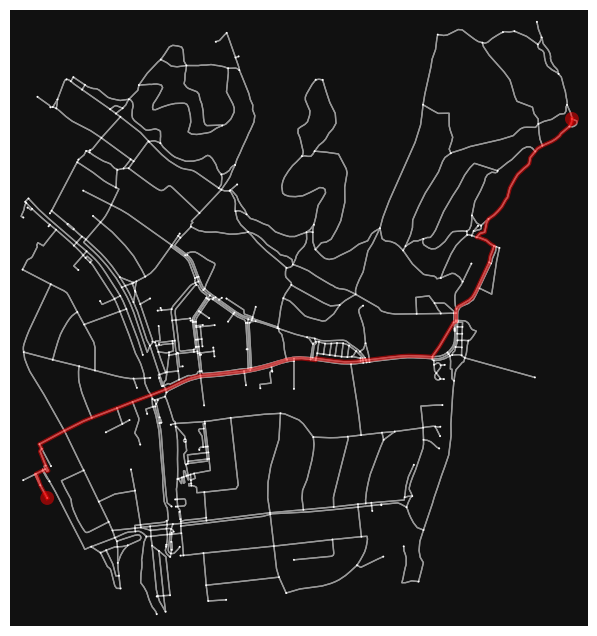

The shortest path is a distance of 1916.56 meters


In [16]:
x = (54.485316336268, 18.568857908249)
y = (54.47666666666667, 18.54890740740741)

shortest_path = find_a_shortest_path_between_two_graph_points(
    start_point=x,
    end_point=y,
    plot_route=True)

print("The shortest path is a distance of", round(shortest_path,2), "meters")

In [17]:
def get_distance_to_nearest_railway_station(
    dataframe_A, dataframe_B,
    columns_with_coordinates:list=None, # 2D list
    max_distance:float=0.3,
    using_tqdm=False
):
    
        
    __dataframe_A = dataframe_A[columns_with_coordinates].copy()
    
    # Calculating closest points in Euclidean metric
    closest_points = find_closest_points(__dataframe_A, dataframe_B[columns_with_coordinates])
    
    points = pd.concat([__dataframe_A, closest_points], axis=1, join="inner")
    
    euclidean_distances = np.sqrt(np.sum(np.square(__dataframe_A.values[:, ...] - closest_points.values), axis=-1))
    points.loc[:,"the distance is acceptable"] = (euclidean_distances<=max_distance).copy()
    
    if not using_tqdm:
        points['distance'] = points.apply(
            lambda row: find_a_shortest_path_between_two_graph_points(
                start_point = (row.iloc[0], row.iloc[1]),
                end_point = (row.iloc[2], row.iloc[3]),
                plot_route=False
            ) if row.iloc[4] else nan, axis=1)
        
        return points['distance']
    
    else:
        distance = []
        # Iterate over the rows of the DataFrame
        for _, row in tqdm(points.iterrows(), total=points.shape[0]):
            if row.iloc[4]:
                distance.append(find_a_shortest_path_between_two_graph_points(
                            start_point = (row.iloc[0], row.iloc[1]),
                            end_point = (row.iloc[2], row.iloc[3]),
                            plot_route = False)
                               )
            else:
                distance.append(-1)
                    
                        
            
        return distance

In [18]:
def preprocess_dataset(
    main_dataset:"pd.DataFrame"=None,
    secondary_dataset:"pd.DataFrame"=None,
    coordinates:list=None,
    columns_to_drop:list=None,
    using_tqdm=False,
    max_distance:float=0.3,
):
    
    dataset = main_dataset.copy()
    
    if coordinates is None:
        coordinates = ['latitude', 'longitude']
        
    if columns_to_drop is None:
        columns_to_drop = [
            '@context', 'name', 'url', 'telephone', 'description',
            'addressCountry', 'streetAddress', 
        ]
        
    dataset.dropna(subset=coordinates[0], inplace=True)
    dataset.dropna(subset=coordinates[1], inplace=True)
    dataset.drop_duplicates(keep='last', inplace=True)
    
    # delete features that will not be used
    dataset.drop(columns=columns_to_drop, inplace=True)
    
    dataset = cast_bool_columns_to_numeric(dataframe=dataset)
    
    dataset['price_min'] = dataset.apply(lambda x: get_first_or_last_numeric_value(x['priceRange'], option='first'), axis=1)
    dataset['price_max'] = dataset.apply(lambda x: get_first_or_last_numeric_value(x['priceRange'], option='last'), axis=1)
    
    dataset_vocabulary = dict()
    for label in ("servesCuisine", "addressLocality", "@type"):
        dataset[label], vocabulary = encode_categorical_features_as_integers(dataset, label=label)
        dataset_vocabulary[label] = vocabulary
        
    dataset['distance [meters]'] = get_distance_to_nearest_railway_station(
        dataset, secondary_dataset,
        columns_with_coordinates=coordinates,
        max_distance=max_distance,
        using_tqdm=using_tqdm)
    
    # delete features that will not be used
    dataset.drop(columns=['priceRange', 'openingHours'], inplace=True)
    
    learning_dataset, prediction_dataset = dataset[pd.notnull(dataset['price_min'])], dataset[pd.isnull(dataset['price_min'])]
    
    return learning_dataset, prediction_dataset

In [19]:
learning_dataset, prediction_dataset = preprocess_dataset(df_restaurants, df_railway_stations, coordinates)

In [21]:
pandas_DataFrame_overview(learning_dataset)

DataFrame Shape : (44, 25)


,Data Types,Unique Values,Missing Values (amount),Missing Values (percentage)
longitude,float64,44,0,0.0
latitude,float64,44,0,0.0
addressLocality,int64,3,0,0.0
@type,int64,1,0,0.0
Facilities for disabled,int32,2,0,0.0
City card,int32,1,0,0.0
No Credit cards,int32,2,0,0.0
Child-friendly,int32,2,0,0.0
Guarded parking,int32,1,0,0.0
servesCuisine,int64,21,0,0.0


First 3 samples:


,longitude,latitude,addressLocality,@type,Facilities for disabled,City card,No Credit cards,Child-friendly,Guarded parking,servesCuisine,...,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,smokingAllowed,Conference facilities,Fireplace,price_min,price_max,distance [meters]
234,18.538940,54.515680,0,0,1,0,0,1,0,6,...,0,1,0,0,0,0,0,26.0,119.0,850.223
240,18.537632,54.508739,0,0,0,0,0,0,0,35,...,1,0,0,1,0,0,0,15.0,20.0,1367.063
242,18.555731,54.505670,0,0,1,0,0,1,0,24,...,0,0,0,1,0,0,0,35.0,72.0,1664.300


In [22]:
pandas_DataFrame_overview(prediction_dataset)

DataFrame Shape : (423, 25)


,Data Types,Unique Values,Missing Values (amount),Missing Values (percentage)
longitude,float64,420,0,0.0
latitude,float64,421,0,0.0
addressLocality,int64,3,0,0.0
@type,int64,7,0,0.0
Facilities for disabled,int32,2,0,0.0
City card,int32,2,0,0.0
No Credit cards,int32,2,0,0.0
Child-friendly,int32,2,0,0.0
Guarded parking,int32,2,0,0.0
servesCuisine,int64,34,0,0.0


First 3 samples:


,longitude,latitude,addressLocality,@type,Facilities for disabled,City card,No Credit cards,Child-friendly,Guarded parking,servesCuisine,...,Credit Cards,Dogs Allowed,Home Delivery,Takeaway,smokingAllowed,Conference facilities,Fireplace,price_min,price_max,distance [meters]
0,18.568858,54.485316,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,1916.565
1,18.547277,54.515975,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,1535.845
2,18.543913,54.515452,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,1268.880


<a name='3'></a>
### 3. Data Visualization

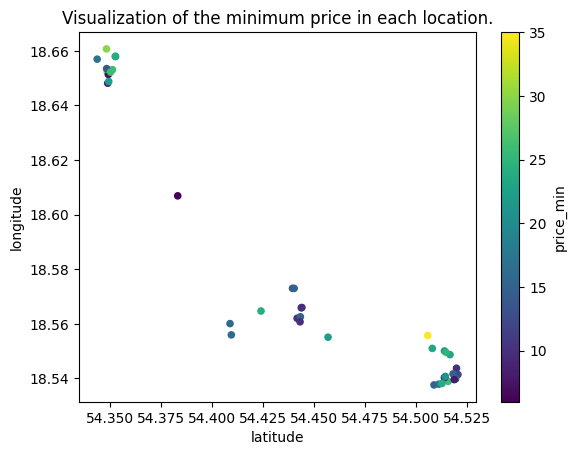

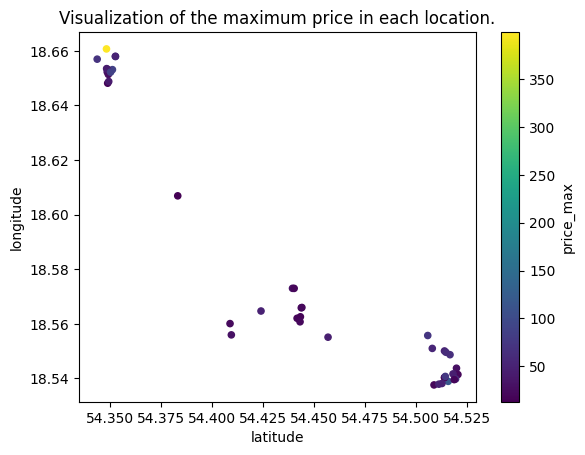

In [23]:
learning_dataset.dropna(subset='price_min').plot.scatter(x=coordinates[0], y=coordinates[1], c='price_min')
plt.title("Visualization of the minimum price in each location.")
plt.show()

learning_dataset.dropna(subset='price_max').plot.scatter(x=coordinates[0], y=coordinates[1], c='price_max')
plt.title("Visualization of the maximum price in each location.")
plt.show()


In [24]:
# centerpoint of the map at avr of df (latitude, longitude)
flMap = folium.Map(
    location=learning_dataset[coordinates].mean(axis=0),
    zoom_start=10.2
)

for _, row in prediction_dataset.iterrows():
    folium.Marker(
        location=[row[coordinates[0]], row[coordinates[1]]],
        popup="Prediction\nType: {}".format(row['@type']),
        icon=folium.map.Icon(color="lightgreen")
    ).add_to(flMap)
    
for _, row in learning_dataset.iterrows():
    folium.Marker(
        location=[row[coordinates[0]], row[coordinates[1]]],
        popup="Learning\nType: {}".format(row['@type']),
        icon=folium.map.Icon(color="lightred")
    ).add_to(flMap)
    

for _, row in df_railway_stations.iterrows():
    folium.Marker(
        location=[row[coordinates[0]], row[coordinates[1]]],
        icon=folium.map.Icon(color="black",icon='road',prefix='fa')
    ).add_to(flMap)

# rendering map
flMap

<a name='4'></a>
## 4. Feature selection

In [25]:
labels_dependant = ['price_min', 'price_max']
labels_independent = learning_dataset.drop(columns=labels_dependant).columns

<a name='4.1'></a>
### 4.1 Discarding features that have low variance

In [26]:
def select_features_by_variance(dataframe, threshold=0.05):
    
    # retrive indexes with variance biger then threshold
    selected_features = dataframe.var()[dataframe.var() > threshold].keys()
    
    # convert pandas.core.indexes.base.Index to list
    selected_features = selected_features.tolist()
    
    return selected_features
    
labels_independent = select_features_by_variance(learning_dataset[labels_independent])

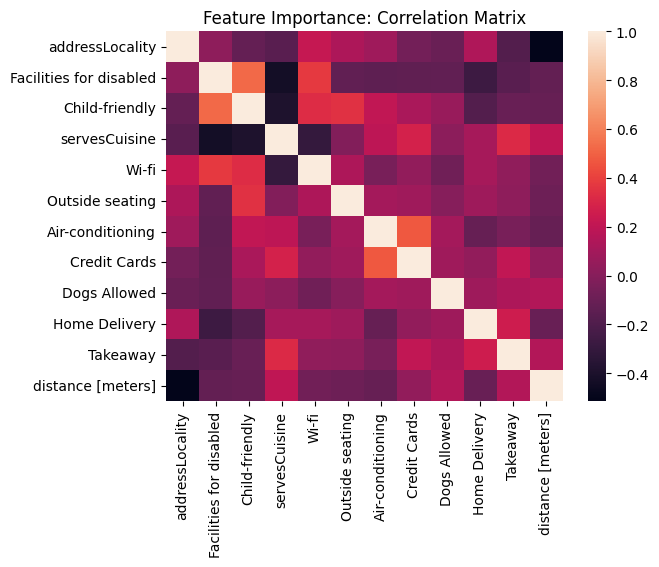

In [27]:
sns.heatmap(learning_dataset[labels_independent].corr())
plt.title('Feature Importance: Correlation Matrix')
plt.show()

<a name='4.2'></a>
### 4.2 Discarding features based on the correlation value 

In [28]:
def select_features_by_correlation(dataframe, threshold=0.96):
    
    # correlation values
    correlation_matrix = dataframe.corr().abs()
    
    # Select features that have a correlation value lower than the threshold
    mask  = np.where(correlation_matrix < threshold)
    
    selected_features = set()
    # Iterate over the correlation matrix and select features below the threshold
    for i, j in zip(*mask):
        if i != j:  # Exclude self-correlations
            selected_features.update({correlation_matrix.columns[i], correlation_matrix.columns[j]})
            
    # convert set to list
    selected_features = list(selected_features)
    
    return selected_features

In [29]:
labels_independent = select_features_by_correlation(learning_dataset[labels_independent])
labels_independent

['Wi-fi',
 'Credit Cards',
 'Dogs Allowed',
 'Air-conditioning',
 'servesCuisine',
 'Home Delivery',
 'addressLocality',
 'distance [meters]',
 'Facilities for disabled',
 'Child-friendly',
 'Outside seating',
 'Takeaway']

<a name='4.3'></a>
### 4.3 Discarding features using genetic algorithm

In [30]:
x = learning_dataset[labels_independent]
y = learning_dataset[labels_dependant[0]]
estimators = LogisticRegression(solver="liblinear", multi_class="ovr")

selectors = GeneticSelectionCV(estimators,
                                  cv=6,
                                  verbose=0,
                                  scoring="neg_root_mean_squared_error",
                                  max_features=5,
                                  tournament_size=4,
                                  caching=True,
                                  n_jobs=-2)
selectors = selectors.fit(x, y)

labels_independent_genetycly_reduced = [i for i, j in zip(labels_independent, selectors.support_) if j]
labels_independent_genetycly_reduced

['Credit Cards']

I decided to omit the genetic feature selection technique because it did not give satisfactory results because produced by it results gave only a feature with zeros and ones that were selected.

<a name='5'></a>
## 5. Model selection
Predictive models will be fitted separately to multiple datasets, so I'm writing functions below to optimize that process. 

Since I'm working with a small dataset, I use GridSearchCV which is used to check all supplied model parameters - this method is not recommended on larger datasets but is acceptable and fast here.

In [31]:
def get_linear_regressor_model(
    dataFrame,
    x_column:str, y_column:str,
    cv=5, # 
    log=True,
):
        """
        get_linear_regressor_model function that fits a linear regression model to pandas.Dataframe column data

        :param dataFrame: pandas.dataFrame containing the columns that will be fitted/predicted to/from the estimated model
        :param x_column: str; independent variables (pandas.dataFrame column name)
        :param y_column: str; dependent variables (pandas.dataFrame column name)
        :param cv: cross-validation splitting strategy
        :param log: bool; if True, the error log is returned at the end of the scrap_inyourpocket function

        :return: linear regression model and a log with messages generated when the function runs
        """
        # input (x_column, y_column)
        x = dataFrame[x_column].values
        
        # output (z_column)
        y = dataFrame[y_column].values
        
        # Pipeline of the learning model
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])

        model.fit(x, y)
        
        # cross-validation
        cv_scores = cross_val_score(model, x, y, cv=cv, scoring='neg_root_mean_squared_error')
        cv_mse = -np.mean(cv_scores)
        
        if log == True:
            log = ["root mean squared error is equal to {:.2f} PLN".format(cv_mse)]
        
        return model, log

In [32]:
def find_best_regressor_model(
    dataFrame,
    x_column:str, y_column:str, # used pandas.dataFrame columns
    param_grid:dict=None,
    num_splits=3, # number of KFold splits
    log=True,
    scoring='neg_root_mean_squared_error',
    regressor='GradientBoostingRegressor',
):
        """
        find_best_regressor_model function that fits a regression model to pandas.Dataframe column data

        :param dataFrame: pandas.dataFrame containing the columns that will be fitted/predicted to/from the estimated model
        :param x_column: str; independent variables (pandas.dataFrame column name)
        :param y_column: str; dependent variables (pandas.dataFrame column name)
        :param param_grid: dict; parameter settings to try as values of the model
        :param num_splits: int; number of KFold splits
        :param log: bool; if True, the error log is returned at the end of the scrap_inyourpocket function
        :param scoring: str; Strategy to evaluate the performance of the scikit-learn cross-validated model
        :param regressor: str; type of used regressor {GradientBoostingRegressor, RandomForestRegressor}

        :return: regression model and a log with messages generated when the function runs
        """
        if param_grid is None:
            param_grid = {
                'regressor__n_estimators': [100, 200, 300],
                'regressor__max_depth': [2, 3, 5]
            }
        if log == True:
            log = list()
            
        if regressor == 'GradientBoostingRegressor':
            regressor = GradientBoostingRegressor()
        elif regressor == 'RandomForestRegressor':
            regressor = RandomForestRegressor()
        
        # input data
        x = dataFrame[x_column].values
        # output data
        y = dataFrame[y_column].values
        
        
        # Pipeline of the learning model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', regressor)
        ])
        
        # initialize cross-validation
        kf = KFold(n_splits=num_splits, shuffle=True, random_state=21)
        
        # Perform grid search with cross-validation
        searchCV_grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring=scoring)
        searchCV_grid.fit(x, y)
        
        best_model = searchCV_grid.best_estimator_
        
        log.extend(["best parameters are "+str(searchCV_grid.best_params_),
                    "root mean squared error is equal to {:.2f} PLN".format(-searchCV_grid.best_score_),
                    "no parameters : "+str(best_model.get_params()['regressor'].n_estimators)
                   ])
        
        
        return best_model, searchCV_grid.best_params_, log

In [33]:
def plot_validation(
    dataFrame,
    x_column:str, y_column:str, # used pandas.dataFrame columns
    regressor='GradientBoostingRegressor',
    steps=12,
    test_size=0.3,
    random_state=42,
    input_params:dict=None
):
        
        if input_params is None:
            params = dict()
        elif isinstance(input_params, dict):
            params = input_params.copy()
        else:
            raise TypeError("input_params must be a dictionary (dict), the current input_params type is {}.".format(type(input_params)))
        
        if 'regressor__max_depth' in params:
            del params['regressor__max_depth']
            
        steps_range = np.arange(1, 1+steps)
        
        def choose_regressor(regressor:str=None):
            if regressor == 'GradientBoostingRegressor':
                return GradientBoostingRegressor()
            elif regressor == 'RandomForestRegressor':
                return RandomForestRegressor()
            return LinearRegression()
        
        # input data
        x = dataFrame[x_column].values
        # output data
        y = dataFrame[y_column].values
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        
        scores_MSE, scores_r2 = [[],[]], [[],[]]
        
        for s in steps_range:
            # configure the model
            model = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', choose_regressor(regressor))
            ])
            model.set_params(regressor__max_depth=s,**params)
            # fit model on the training dataset
            model.fit(x_train, y_train)
            # evaluate
            scores_MSE[0].append(
                mean_squared_error(y_train, model.predict(x_train))
            )
            scores_MSE[1].append(
                mean_squared_error(y_test, model.predict(x_test))
            )
            scores_r2[0].append(
                r2_score(y_train, model.predict(x_train))
            )
            scores_r2[1].append(
                r2_score(y_test, model.predict(x_test))
            )
        fig = plt.figure(figsize=(10, 4))
        fig.tight_layout()
        ax1 = fig.add_subplot(121)
        ax1.plot(steps_range, scores_MSE[0], '.-', label='Train')
        ax1.plot(steps_range, scores_MSE[1], '.-', label='Test')
        ax1.set_xlabel('Depth')
        ax1.set_ylabel('Mean Squared Error')
        ax1.legend(loc="center right")
        ax1.grid(True)
        
        ax2 = fig.add_subplot(122)
        ax2.plot(steps_range, scores_r2[0], '.-', label='Train')
        ax2.plot(steps_range, scores_r2[1], '.-', label='Test')
        ax2.set_xlabel('Depth')
        ax2.set_ylabel(f"$R^{2}$")
        ax2.legend(loc="center right")
        ax2.grid(True)
        
        plt.suptitle("Overfitting Analysis for "+regressor)

        plt.show()

In [34]:
def predict_values(model, x, y=nan, ignore_y_nan_values=True):
        """
        predict_values function returns the value predicted by the given scikit-learn model if that value has not already been provided

        :param model: scikit-learn model
        :param x: list or int (the type of x depends on the provided model); independent variables
        :param y: str; the dependent variable
        :param ignore_y_nan_values: bool; 

        :return: value predicted by the given scikit-learn model if that value has not already been provided
        """
        if ignore_y_nan_values == True:
            if y == nan:
                return y

        return model.predict(x)[0]

In [35]:
parameters = {'dataFrame':learning_dataset, 'x_column':labels_independent}

Estimating Linear Regression model:

In [36]:
# Trying to predict minimum prices
price_min_linear_Model, log = get_linear_regressor_model(
    y_column='price_min',
    **parameters
)
print('price_min', *log, sep='\n', end='\n\n')

# Trying to predict maximum prices
price_max_linear_Model, log = get_linear_regressor_model(
    y_column='price_max',
    **parameters
)
print('price_max', *log, sep='\n')

price_min
root mean squared error is equal to 9.46 PLN

price_max
root mean squared error is equal to 68.44 PLN


Estimating RandomForestRegressor model:

price_min
best parameters are {'regressor__max_depth': 4, 'regressor__n_estimators': 11}
root mean squared error is equal to 7.09 PLN
no parameters : 11



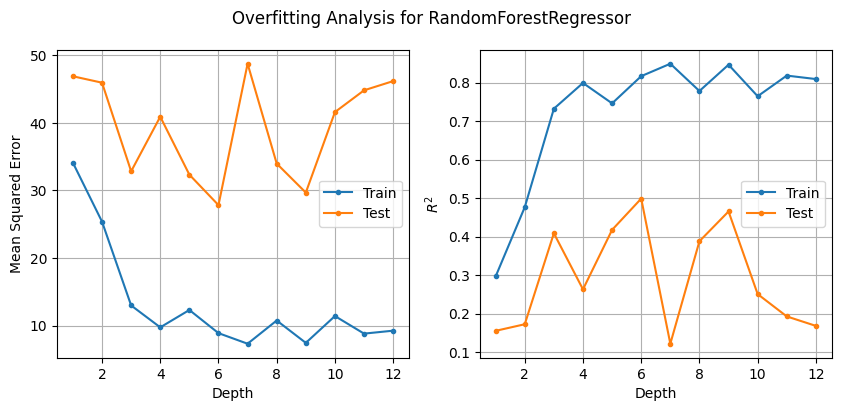

price_max
best parameters are {'regressor__max_depth': 7, 'regressor__n_estimators': 24}
root mean squared error is equal to 47.38 PLN
no parameters : 24


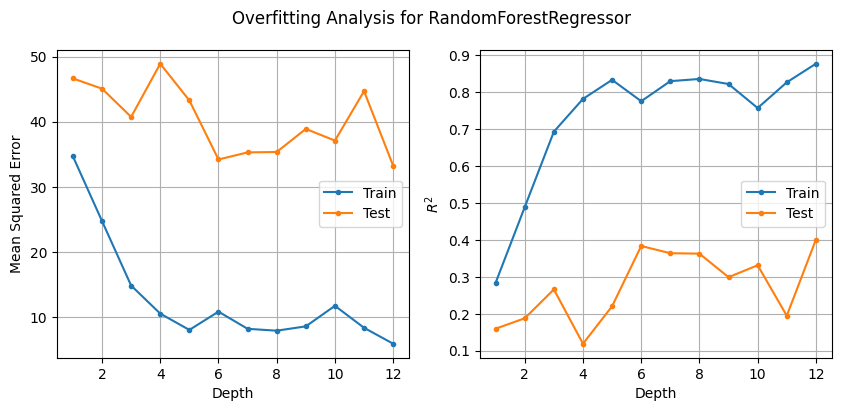

In [37]:
param_grid = {
    'regressor__n_estimators': [i for i in range(10, 30)],
    'regressor__max_depth': [i for i in range(1,10)],
}

# Trying to predict minimum prices
price_min_randomForest_Model, price_min_randomForest_Model_params, log = find_best_regressor_model(
    param_grid=param_grid,
    regressor='RandomForestRegressor',
    y_column='price_min',
    **parameters
)
print('price_min', *log, sep='\n', end='\n\n')

plot_validation(
    input_params = price_min_randomForest_Model_params,
    regressor='RandomForestRegressor',
    y_column='price_min',
    **parameters
)

# Trying to predict maximum prices
price_max_randomForest_Model, price_max_randomForest_Model_params, log = find_best_regressor_model(
    param_grid=param_grid,
    regressor='RandomForestRegressor',
    y_column='price_max',
    **parameters
)
print('price_max', *log, sep='\n')

plot_validation(
    input_params = price_min_randomForest_Model_params,
    regressor='RandomForestRegressor',
    y_column='price_min',
    **parameters
)


Estimating GradientBoostingRegressor model:

price_min
best parameters are {'regressor__max_depth': 4, 'regressor__n_estimators': 10}
root mean squared error is equal to 7.73 PLN
no parameters : 10



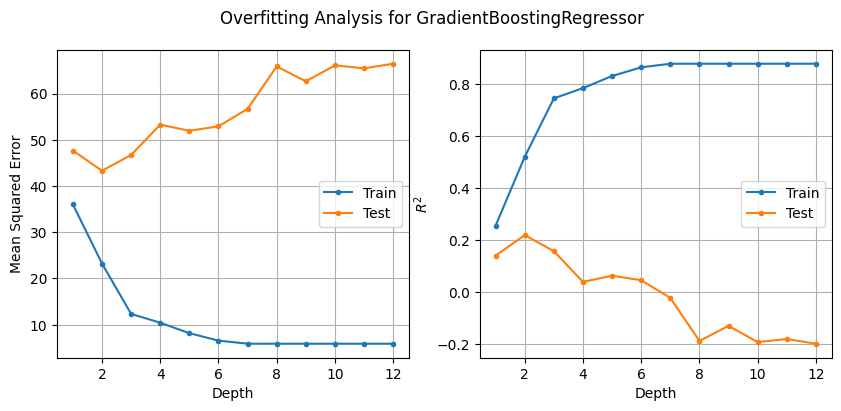

price_max
best parameters are {'regressor__max_depth': 4, 'regressor__n_estimators': 10}
root mean squared error is equal to 43.92 PLN
no parameters : 10


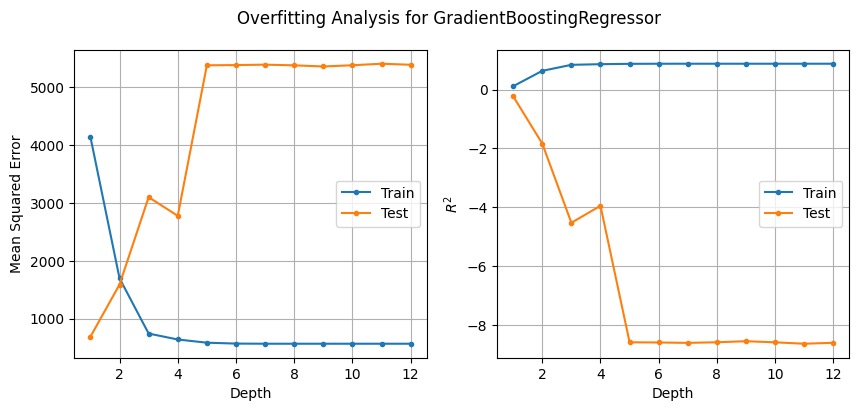

In [38]:
# Trying to predict minimum prices
price_min_GBR_Model, price_min_randomForest_GBR_Model_params, log = find_best_regressor_model(
    param_grid=param_grid,
    y_column='price_min',
    **parameters
)
print('price_min', *log, sep='\n', end='\n\n')

plot_validation(
    input_params = price_min_randomForest_GBR_Model_params,
    y_column='price_min',
    **parameters
)

# Trying to predict maximum prices
price_min_GBR_Model, price_max_randomForest_GBR_Model_params, log = find_best_regressor_model(
    param_grid=param_grid,
    y_column='price_max',
    **parameters
)
print('price_max', *log, sep='\n')

plot_validation(
    input_params = price_max_randomForest_GBR_Model_params,
    y_column='price_max',
    **parameters
)

Summarizing the above models, I will try to describe each of them in the appropriate table and column:<br>

Models that aim to predict the __'min price'__:<br>

|variable assigned to model|comment|RMSE score|
|:-|:-:|-:|
|price_min_linear_Model|highest RMSE compared to other models|9.46|
|price_min_randomForest_Model||7.09 |
|price_min_randomForest_GBR_Model_params|low $R^{2}$|7.73|

As __'price_min_randomForest_Model'__ have the best performance, RMSE, and R2 are within reasonable limits,  __'price_min_randomForest_Model'__ is selected to be used in further steps.<br>

Models that aim to predict the __'max price'__:<br>

|variable assigned to model|comment|RMSE score|
|:-|:-:|-:|
|price_max_linear_Model|highest RMSE compared to other models|68.44|
|price_max_randomForest_Model|looking at the test set loss curve - the model may be overtrained|47.38|
|price_max_randomForest_GBR_Model_params|negative $R^{2}$|43.92|

Since all models aiming to predict 'max price' have critical problems, no model is selected for use in further steps. It is suspected that models failed due to a low number of training samples, there are several further steps to consider:
* collection of additional data samples,
* selection of different features ([Feature selection](#4) stage),
    * selecting a lower amount of features might be helpful i.e. dimensionality reduction via [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), [t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), or different space reduction techniques,
* selection of different models ([Model selection](#5) stage) or/and considering regularization techniques.

<a name='6'></a>
## 6. Prediction
Applayng best models to '*learning_dataset*':

In [41]:
prediction_dataset['predicted min price'] = price_min_randomForest_Model.predict(prediction_dataset[labels_independent])

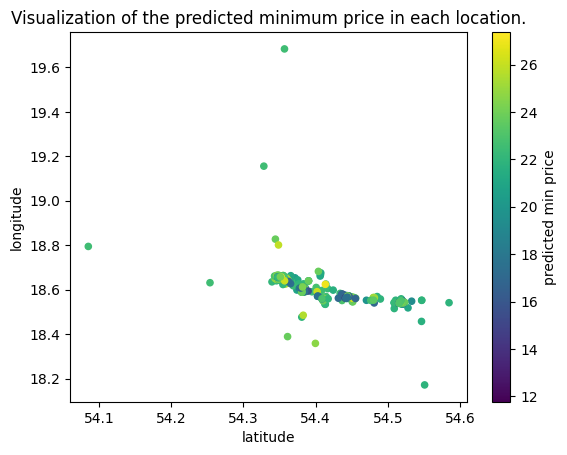

In [43]:
prediction_dataset.plot.scatter(x=coordinates[0], y=coordinates[1], c='predicted min price')
plt.title("Visualization of the predicted minimum price in each location.")
plt.show()